In [9]:
import pandas as pd
import numpy as np
from scipy import stats

In [10]:
# Define function to remove outliers using z-score
def remove_outliers(df):
    z = np.abs(stats.zscore(df))
    df = df[(z < 3).all(axis=1)]
    return df

In [11]:
# Define function to clean data
def clean_data(df):
    # Remove null values
    df = df.dropna()

    # Remove outliers
    df = remove_outliers(df)

    # Fill missing values with '0'
    df = df.fillna(0)

    # Ensure both columns have equal data points
    min_len = min(len(df['Before']), len(df['After']))
    df = df.iloc[:min_len, :]

    return df


In [12]:
# Loop through csv files in both folders
for folder in ['Intention', 'Operation']:
    for metric in ['LCOM', 'CBO', 'RFC', 'DIT', 'NOC', 'WMC', 'LOC']:
        file_path = f"{folder}/{metric}.csv"
        df = pd.read_csv(file_path)

        # Clean data
        df = clean_data(df)

        # Save cleaned data to file
        df.to_csv(f"{folder}/{metric}_cleaned.csv", index=False)

In [20]:
#Mean Before , After and P-Value Calcualtion

import pandas as pd
from scipy.stats import ttest_rel
from scipy.stats import ranksums

# List of metric names
metrics = ['LOC', 'CBO', 'NOC', 'DIT', 'RFC', 'LCOM', 'WMC']

# Empty lists to store means and p-values for each metric
means_before = []
means_after = []
p_values = []



means_before_op = []
means_after_op = []
p_values_op = []


# Loop over each metric
for metric in metrics:
    # Load CSV file for current metric
    df = pd.read_csv(f'/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Intention/{metric}_cleaned.csv')
    df_op = pd.read_csv(f'/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Operation/{metric}_cleaned.csv')

    # Calculate mean for "before" and "after" columns
    mean_before = df['Before'].mean()
    mean_after = df['After'].mean()
    
    mean_before_op = df_op['Before'].mean()
    mean_after_op = df_op['After'].mean()
    
    
    # Calculate p-value using a two-sided t-test
    _, p_value = ranksums(df['Before'], df['After'])
    _, p_value_op = ranksums(df_op['Before'], df_op['After'])


    
    # Append means and p-value to their respective lists
    means_before.append(mean_before)
    means_after.append(mean_after)
    p_values.append(p_value)


    means_before_op.append(mean_before_op)
    means_after_op.append(mean_after_op)
    p_values_op.append(p_value_op)

    

# Create a new dataframe with the results
results_df = pd.DataFrame({'Metric': metrics, 'Mean Before': means_before, 'Mean After': means_after, 'Wilcoxon P-value': p_values})

results_df_op = pd.DataFrame({'Metric': metrics, 'Mean Before': means_before_op, 'Mean After': means_after_op, 'Wilcoxon P-value': p_values_op})

# Format p-values as floating-point numbers with 4 decimal places
results_df['Wilcoxon P-value'] = results_df['Wilcoxon P-value'].apply(lambda x: f'{x:.8f}')
results_df_op['Wilcoxon P-value'] = results_df_op['Wilcoxon P-value'].apply(lambda x: f'{x:.8f}')


# Print the results dataframe
print("Intention")
print(results_df)
print("\nOperation")
print(results_df_op)


Intention
  Metric  Mean Before  Mean After Wilcoxon P-value
0    LOC    71.351964   70.664528       0.48662722
1    CBO     9.988894    9.968665       0.94661051
2    NOC     0.056341    0.056341       0.99340516
3    DIT     1.489047    1.493685       0.69329284
4    RFC    22.229282   22.275316       0.64330342
5   LCOM    24.811997   24.565544       0.51891176
6    WMC    12.045101   11.860135       0.30012659

Operation
  Metric  Mean Before  Mean After Wilcoxon P-value
0    LOC    79.977154   78.257514       0.40691346
1    CBO     9.589153    9.392359       0.05824966
2    NOC     0.070028    0.063655       0.97814829
3    DIT     1.666104    1.658442       0.27354621
4    RFC     9.746828    9.645687       0.89071248
5   LCOM    25.414458   25.129388       0.59687959
6    WMC    15.500495   14.907143       0.35380752


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


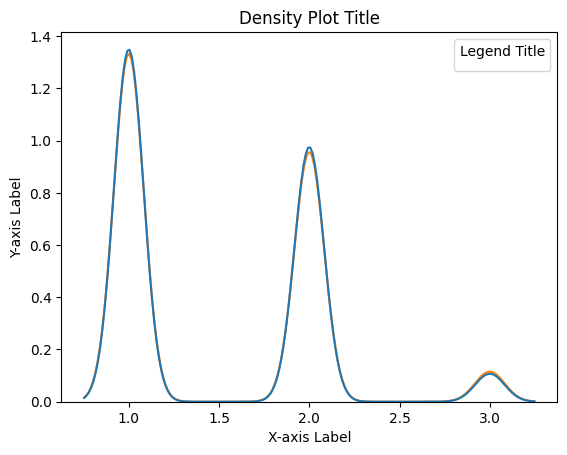

In [14]:

import matplotlib.pyplot as plt
import seaborn as sns
def create_boxplot(datafile):
    # Read the CSV file into a pandas DataFrame
    df = pd.read_csv(datafile)

    # Select the two columns of data to use for the box plot
    data1 = df['Before']
    data2 = df['After']

    # Create a list of the two columns of data
    data = [data1, data2]

    # Create the box plot using matplotlib
    sns.kdeplot(data)

    # Show the plot
    plt.legend(title='Legend Title')
    plt.title('Density Plot Title')
    plt.xlabel('X-axis Label')
    plt.ylabel('Y-axis Label')

    plt.show()

create_boxplot('/Users/pranay/Stevens/Spring 23/SSW-567-A Software Testing/Assignments/Group/Repository/TestingProject/Intention/DIT_cleaned.csv')

In [18]:
import pandas as pd
from scipy.stats import ttest_ind, ranksums

# Load data
intention_files = ['Intention/LCOM_cleaned.csv', 'Intention/CBO_cleaned.csv', 'Intention/RFC_cleaned.csv', 'Intention/DIT_cleaned.csv', 'Intention/NOC_cleaned.csv', 'Intention/WMC_cleaned.csv', 'Intention/LOC_cleaned.csv']
operation_files = ['Operation/LCOM_cleaned.csv', 'Operation/CBO_cleaned.csv', 'Operation/RFC_cleaned.csv', 'Operation/DIT_cleaned.csv', 'Operation/NOC_cleaned.csv', 'Operation/WMC_cleaned.csv', 'Operation/LOC_cleaned.csv']

intention_dfs = [pd.read_csv(file) for file in intention_files]
operation_dfs = [pd.read_csv(file) for file in operation_files]

# Calculate difference between Before and After columns for each metric
for i, metric in enumerate(['LCOM', 'CBO', 'RFC', 'DIT', 'NOC', 'WMC', 'LOC']):
    intention_diff = intention_dfs[i]['After'] - intention_dfs[i]['Before']
    operation_diff = operation_dfs[i]['After'] - operation_dfs[i]['Before']
    
    # Perform statistical tests
    t, t_pval = ttest_ind(intention_diff, operation_diff)
    u, u_pval = ranksums(intention_diff, operation_diff)
    
    # Report results
    print(f"Results for {metric}:")
    print(f"Wilcoxon rank-sum p-value: {u_pval}\n")


Results for LCOM:
Wilcoxon rank-sum p-value: 0.925848795504806

Results for CBO:
Wilcoxon rank-sum p-value: 0.28100040394795556

Results for RFC:
Wilcoxon rank-sum p-value: 0.46060102954924054

Results for DIT:
Wilcoxon rank-sum p-value: 0.13240799012522225

Results for NOC:
Wilcoxon rank-sum p-value: 0.9318335267629203

Results for WMC:
Wilcoxon rank-sum p-value: 0.43164934645960606

Results for LOC:
Wilcoxon rank-sum p-value: 0.6859946476566565

